In [1]:
import os
import numpy as np
import heapq
from typing import Union
# note networkx is only used for additional visualization functions
import networkx as nx

class Graph:

    def __init__(self, adjacency_mat: Union[np.ndarray, str]):
        """
    
        Unlike the BFS assignment, this Graph class takes an adjacency matrix as input. `adjacency_mat` 
        can either be a 2D numpy array of floats or a path to a CSV file containing a 2D numpy array of floats.

        In this project, we will assume `adjacency_mat` corresponds to the adjacency matrix of an undirected graph.
    
        """
        if type(adjacency_mat) == str:
            self.adj_mat = self._load_adjacency_matrix_from_csv(adjacency_mat)
        elif type(adjacency_mat) == np.ndarray:
            self.adj_mat = adjacency_mat
        else: 
            raise TypeError('Input must be a valid path or an adjacency matrix')
        self.mst = None

    def _load_adjacency_matrix_from_csv(self, path: str) -> np.ndarray:
        with open(path) as f:
            return np.loadtxt(f, delimiter=',')

    #def construct_mst(self):

    def prims(self):
        n = len(self.adj_mat)
        mst = np.zeros((n, n))
        visited = [False] * n
        min_edges = [(float('inf'), 0, 0) for i in range(n)]
        heap = [ (0, 0, -1) ]
        while heap:
            weight, u, v = heapq.heappop(heap)
            if visited[u]:
                continue
            visited[u] = True
            if v != -1:
                mst[u][v] = weight
                mst[v][u] = weight
            for i in range(n):
                if self.adj_mat[u][i] > 0 and not visited[i]:
                    heapq.heappush(heap, (self.adj_mat[u][i], i, u))
        self.mst = mst

    def visualize_mst(self):
        graph = nx.Graph(mst)
        pos = nx.spring_layout(graph)
        nx.draw(graph, pos, with_labels=True)
        labels = nx.get_edge_attributes(graph, 'weight')
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
        plt.show()
    
    def visualize_graph(self):
        G = nx.Graph(self.adj_mat)
        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos)
        nx.draw_networkx_edges(G, pos)
        nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
        plt.show()

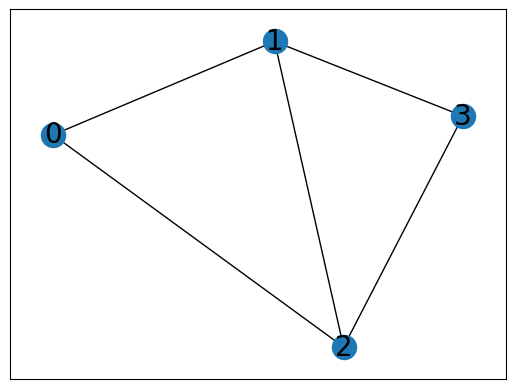

In [125]:
adj_mat = np.array([[0, 3, 1, 0],
                    [3, 0, 2, 5],
                    [1, 2, 0, 4],
                    [0, 5, 4, 0]])

# create a Graph object with the adjacency matrix
g = Graph(adj_mat)

# visualize the whole graph
g.visualize_graph()

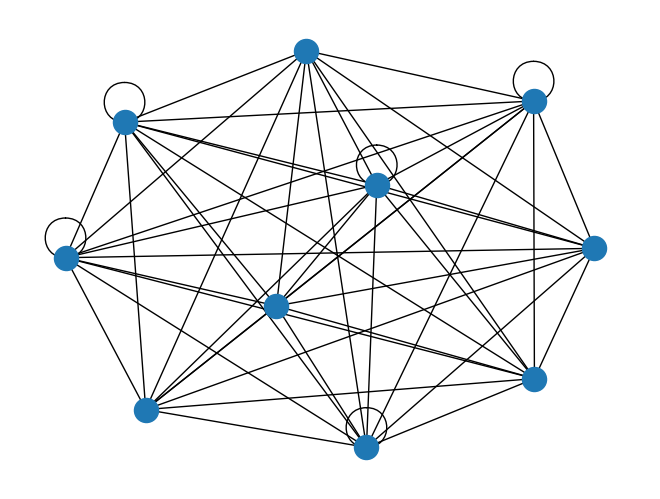

In [118]:
file_path = '../data/small.csv'
G_ex = nx.complete_graph(file_path)
nx.draw(G_ex)
mst_ex= nx.minimum_spanning_tree(G_ex, algorithm='prim')
#nx.draw(mst_ex)

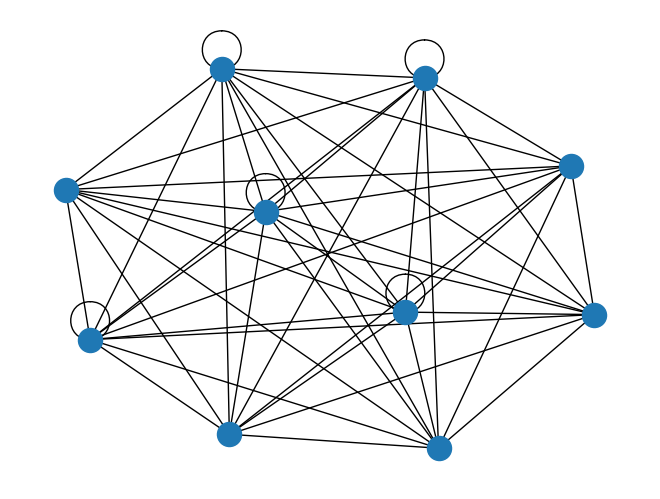

In [119]:
file_path = '../data/small.csv'
G_ex = nx.complete_graph(file_path)
nx.draw(G_ex)
mst_ex= nx.minimum_spanning_tree(G_ex, algorithm='prim')

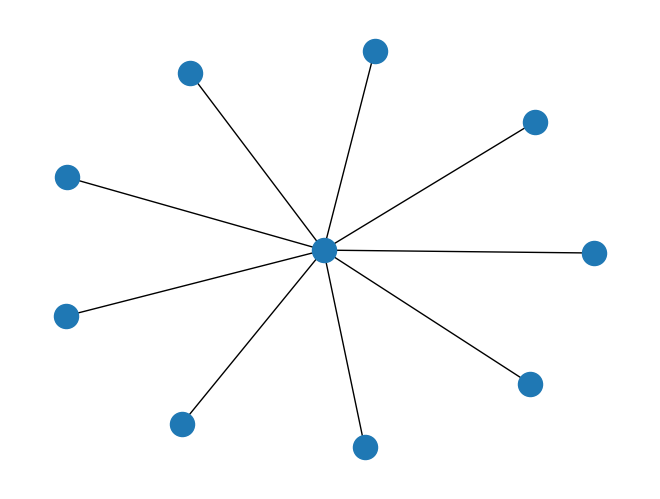

In [120]:
nx.draw(mst_ex)

In [2]:
import numpy as np
import heapq
from typing import Union

class Graph:

    def __init__(self, adjacency_mat: Union[np.ndarray, str]):
        """
    
        Unlike the BFS assignment, this Graph class takes an adjacency matrix as input. `adjacency_mat` 
        can either be a 2D numpy array of floats or a path to a CSV file containing a 2D numpy array of floats.

        In this project, we will assume `adjacency_mat` corresponds to the adjacency matrix of an undirected graph.
    
        """
        if type(adjacency_mat) == str:
            self.adj_mat = self._load_adjacency_matrix_from_csv(adjacency_mat)
        elif type(adjacency_mat) == np.ndarray:
            self.adj_mat = adjacency_mat
        else: 
            raise TypeError('Input must be a valid path or an adjacency matrix')
        self.mst = None

    def _load_adjacency_matrix_from_csv(self, path: str) -> np.ndarray:
        with open(path) as f:
            return np.loadtxt(f, delimiter=',')

    def construct_mst(self):
        n = len(self.adj_mat)
        mst = np.zeros((n, n))
        visited = [False] * n
        min_edges = [(float('inf'), 0, 0) for i in range(n)]
        heap = [ (0, 0, -1) ]
        while heap:
            weight, u, v = heapq.heappop(heap)
            if visited[u]:
                continue
            visited[u] = True
            if v != -1:
                mst[u][v] = weight
                mst[v][u] = weight
            for i in range(n):
                if self.adj_mat[u][i] > 0 and not visited[i]:
                    heapq.heappush(heap, (self.adj_mat[u][i], i, u))
        self.mst = mst


    #some helper  helper functions for visualization
    def visualize_mst(self):
        graph = nx.Graph(mst)
        pos = nx.spring_layout(graph)
        nx.draw(graph, pos, with_labels=True)
        labels = nx.get_edge_attributes(graph, 'weight')
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
        plt.show()
    
    def visualize_graph(self):
        G = nx.Graph(self.adj_mat)
        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos)
        nx.draw_networkx_edges(G, pos)
        nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
        plt.show()
    
  
     


     

In [8]:
from sklearn.metrics import pairwise_distances


def check_mst(adj_mat: np.ndarray, 
              mst: np.ndarray, 
              expected_weight: int, 
              allowed_error: float = 0.0001):
    """
    
    Helper function to check the correctness of the adjacency matrix encoding an MST.
    Note that because the MST of a graph is not guaranteed to be unique, we cannot 
    simply check for equality against a known MST of a graph. 
    Arguments:
        adj_mat: adjacency matrix of full graph
        mst: adjacency matrix of proposed minimum spanning tree
        expected_weight: weight of the minimum spanning tree of the full graph
        allowed_error: allowed difference between proposed MST weight and `expected_weight`
    TODO: Add additional assertions to ensure the correctness of your MST implementation. For
    example, how many edges should a minimum spanning tree have? Are minimum spanning trees
    always connected? What else can you think of?
    """

    def approx_equal(a, b):
        return abs(a - b) < allowed_error

    total = 0
    for i in range(mst.shape[0]):
        for j in range(i+1):
            total += mst[i, j]
    assert approx_equal(total, expected_weight), 'Proposed MST has incorrect expected weight'


file_path = '../data/slingshot_example.txt'
coords = np.loadtxt(file_path) # load coordinates of single cells in low-dimensional subspace
dist_mat = pairwise_distances(coords) # compute pairwise distances to form graph
g = Graph(dist_mat)
g.construct_mst()

check_mst(g.adj_mat, g.mst, 57.263561605571695)
